===================================================     
    This code is created by :
    
    Dr. Vikram Singh Dharodi,
    Institute for Plasma research,India,
    Email: dharodiv@msu.edu,
    Web: https://sites.google.com/site/vsdharodi
===================================================    

## Newtonian dynamics of a particle in asymmetric double-well potential:

### Step 1. Define the potential well

### Step 2. Define the initial conditions

### Step 3. Move the particle in well by using the Newton's equation of motion $f=ma$

In [19]:
# importing the required modules 
import time
import matplotlib.pyplot as plt 
import numpy as np 
import math 
print ('Updated on', time.strftime("%d/%m/%Y"))

Updated on 11/07/2021


In [20]:
# setting the x-coordinates 
rmin=-10
rmax=10
ngr=1200
rdis = np.linspace(rmin,rmax,ngr)
#print(xx)

In [21]:
# Parameters of double-well potential:
cntr=0;
a4 =1/(2.50e+12)
a2 =1/(3.50e+10) 
sigma=2.0e-10
coff=math.sqrt(a4/(2*a2))
coffw=sigma*coff
UEnergy =a4*(rdis-cntr)**4-a2*(rdis-cntr)**2+coffw*(rdis-cntr)

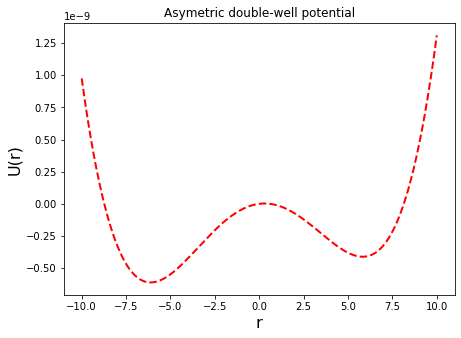

In [22]:
fig_well = plt.figure(figsize=(7,5))
plt.plot(rdis,UEnergy, linestyle='--', color='r',linewidth=2)
plt.title('Asymetric double-well potential', fontsize=12)
# plt.yticks(np.arange(-1e-9, 1.5e-9, 0.5e-9), fontsize=12)
# plt.xticks(np.arange(-12, 12, 2.5), fontsize=12) 
plt.xlabel('r', fontsize=16)  
plt.ylabel('U(r)', fontsize=16)  
plt.show()
# fig.savefig('fig_well.png', dpi=300)

In [23]:
Ubmp = UEnergy[(rdis>=-1) & (rdis<=1)]
Ubump=max(Ubmp)
UminR=min(UEnergy[(rdis>=4) & (rdis<=10)])
rint = rdis[np.where(UEnergy == UminR)]
IntPE =a4*(rint-cntr)**4-a2*(rint-cntr)**2+coffw*(rint-cntr)
# #https://stackoverflow.com/questions/13869173/numpy-find-index-of-the-elements-within-range

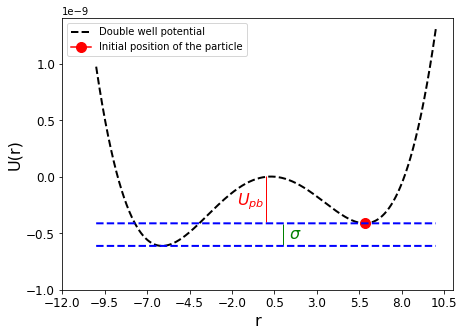

In [24]:
fig_well_prtcl = plt.figure(figsize=(7,5))
plt.plot(rdis,UEnergy, linestyle='--', color='k',linewidth=2)
plt.plot(rint,IntPE, marker=".",markersize=20, color='r')
plt.legend(["Double well potential", "Initial position of the particle"])
plt.plot(rdis,IntPE*np.ones(rdis.size), linestyle='--', color='b',linewidth=2)
plt.plot(rdis,min(UEnergy)*np.ones(rdis.size), linestyle='--', color='b',linewidth=2)
plt.text(rint-4.5,0.54*(min(UEnergy)+IntPE),'$\sigma$', fontsize=16, color='g')
plt.arrow(1.0, -0.6e-9, 0, 1e-12, width=0.4e-10, color='g')
plt.text(0.0-1.7,-0.25e-9,'$U_{pb}$', fontsize=16, color='r')
plt.arrow(0.0,-0.4e-9, 0, 1e-12, width=0.9e-10, color='r')
# plt.arrow(x=4, y=18, dx=2, dy=5, width=.06) 
# plt.title('Initial position of a particle', fontsize=12)
plt.yticks(np.arange(-1e-9, 1.5e-9, .5e-9), fontsize=12)
plt.xticks(np.arange(-12, 12, 2.5), fontsize=12) 
plt.xlabel('r', fontsize=16)  
plt.ylabel('U(r)', fontsize=16)  
plt.show()

𝛔 : Shift between bottoms of the wells (asymmetric parameter).

𝑈𝑝𝑏 : Potential barrier. 

### Step 2. Intial conditions: Initial position & velocity of particle in well

The initial position of particle is $x(t=0)$= minimum of the right well. It is clear from above figure $U_{pb}=E_{bump}-E_{minR}$. Thus, to cross the potential barrier $U_{pb}$ this particle should have the ratio of kinetic energy with $U_{pb}$ greater than unity i.e
 
 $1<V_0=\frac{{\frac{1}{2}}{m}{v^2}}{U_{pb}}$; m is the mass of the particle.

$v(t=0)=V_0{\sqrt{\frac{2U_{pb}}{m}}}$.

In the present case, we consider $V_0=0.9$ which implies that the particle will remain comfine in the right well for forever.

In [25]:
# Set initial velocity 
Vcoeff=0.9
mass=1.455000e-22
Eshift=Ubump-UminR
vint=Vcoeff*math.sqrt(2*Eshift/mass) 

### Step 3. Hamiltonian of the classical particle in a potential U(r) is the following

 $H=\frac{p^2}{2m}+U(r)$, where  $f(r)=-{\nabla_r}U(r)$


### Newton's equation of motion, f=ma ==>  $m{\ddot{r}}=f(r)$
  
  
 ${\dot{r}}=v$ ==> $r=r_0+v{dt}$
 
 ${\dot{v}}={\frac{f(r)}{m}}$ ==> $v=v_0+{\frac{f(r)}{m}}{dt}$
  
  dt is the time step to advance the particle.

In [26]:
# Define force to update it with time

def my_double_well_force(x,cntr,a,b,coff2):
    force =-4*a*(x-cntr)**3+2*b*(x-cntr)-coff2 
    return force
#print(force)

In [27]:
from celluloid import Camera
%matplotlib inline
from IPython.display import HTML

nsteps=2000
pltstep=40
dt = 1.0e-8 

pos=[None]*nsteps
vel=[None]*nsteps
tstep=[None]*nsteps
PEng=[None]*nsteps
KEng=[None]*nsteps
TEng=[None]*nsteps

pos = np.array(pos, dtype="object")
vel = np.array(vel, dtype="object")
tstep=np.array(tstep, dtype="object")
PEng=np.array(PEng, dtype="object")
KEng=np.array(KEng, dtype="object")
TEng=np.array(TEng, dtype="object")

fig = plt.figure(dpi = 100)
fig.set_figheight(8)
fig.set_figwidth(8)

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(2,2,(3,4))
fig.suptitle('Newtonian dynamics', fontsize=20)
plt.ion()
plt.close()
camera = Camera(fig)
cntf=0
##########################################################
#################### Newtonian dynamics ##################
#################### The velocity Verlet algorithm #######
##########################################################
for step in range(0,nsteps):
    cntf=cntf+1
    cnt=cntf-1
    old_pos=rint
    old_force=my_double_well_force(rint,cntr,a4,a2,coffw)
    
    # v(t) 
    vdtby2= vint + (dt/2)*(old_force/mass)
    
    # x(t+dt) Update postion
    rdt = rint+vdtby2*dt
    
    new_force=my_double_well_force(rdt,cntr,a4,a2,coffw)
    
    # v(t+dt) Update velocity
    vdt = vdtby2 + (dt/2)*(new_force/mass)
    
    vint=vdt
    rint=rdt
 ##########################################################
##########################################################

    npos=rdt
    nvel=vdt

    UPE =a4*(npos-cntr)**4-a2*(npos-cntr)**2+coffw*(npos-cntr)
    KE=0.5*mass*(nvel**2)
    TE=UPE+KE  
    
    pos[step]=npos
    vel[step]=nvel   
    tstep[step]=step
    PEng[step]=UPE
    KEng[step]=KE
    TEng[step]=TE  
    time=cnt*dt
    
#    
    if step % pltstep == 0:
#        print(step)
        ax1.plot(rdis,UEnergy, linestyle='--', color='k',linewidth=2)
        ax1.plot(rint,UPE, marker=".",color='r', markersize=10) 
        ax1.set_xlim([-12, 12])
        ax1.set_ylim([-1e-9, 1.5e-9])
        ax1.set_title('Particle in well')
        ax1.legend(['Step=%i' %cnt])
        ax1.set_xlabel('r', fontsize=16)  
        ax1.set_ylabel('U(r)', fontsize=16) 
        
        ax2.plot(pos,vel, linestyle='-', color='k',linewidth=2)
        ax2.plot(rint,vint, marker=".",color='r', markersize=10)
        ax2.set_xlim([-12, 12])
#         ax2.set_ylim([-3e6, 3e6])
        ax2.set_title('Phase Space')
        ax2.legend(['t=%.2e' %time])
        ax2.set_xlabel('r', fontsize=16)  
        ax2.set_ylabel('V(r)', fontsize=16)  
#       ax2.set_xticks(np.arange(min(x), max(x), 2.5), minor=False)
    
        ax3.plot(tstep,PEng,'g',tstep,KEng,'b',tstep,TEng,'r')
        ax3.legend(['Pot Eng=%i' %cnt, 'Kin Eng', 'Total Eng'])
        ax3.set_xlim([0,nsteps])
#         ax3.set_ylim([-5e-10, 5e-10])  
        ax3.set_title('Energy Conservation')
#        ax3.legend(['Step=%i' %cnt])
        ax3.set_xlabel('Step', fontsize=16)  
        ax3.set_ylabel('Energy', fontsize=16)  
        ax3.set_xticks(np.arange(0, nsteps, 200), minor=False)
        fig.canvas.draw() 
        camera.snap()        
#       plt.show() 
#       plt.pause(.1) 
        fig.tight_layout(pad=2.0)
# animation = camera.animate(blit=True, interval=10)        
animation = camera.animate()
# HTML(animation.to_html5_video())
HTML(animation.to_jshtml())
# animation.save('z_animation_Newton0p9.mp4')
# animation.save('animation1.gif', writer='pillow', fps=2)